# Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn’t really matter whether you’re forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating such as Teen or Mature.

## Plan:

1. Open the data file and study the general information

2. Prepare the data

3. Analyze the data

4. Create a user profile for each region

5. Test hypotheses

6. Write a general conclusion

In [2]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [78]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sidetable 
import seaborn as sns
from scipy import stats as st
import plotly.express as px

### 1. Open the data file and study the general information

In [79]:
#open file
try:
    games_data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")
except:
    games_data = pd.read_csv('/datasets/games.csv ') 

In [80]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [81]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [82]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### 2. Prepare the data

Need to:

Replace the column names (make them lowercase).

Convert the data to the required types.

Describe the columns where the data types have been changed and why.

If necessary, decide how to deal with missing values:
Explain why you filled in the missing values as you did or why you decided to leave them blank.
Why do you think the values are missing? Give possible reasons.

Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.


In [83]:
#percentage of missing values
games_data.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


There are missing values in columns: 

name

genre

critic_score       

user_score         

rating             

In [84]:
#find duplicates
games_data.duplicated().sum()

0

In [85]:
#make column names lowercase
games_data.columns = games_data.columns.str.lower()
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


It's better to change Data type for user_score column from object to float.

In [86]:
#find unique values
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [87]:
#count amount of 'tbd' values in column
games_data.loc[games_data['user_score'] == 'tbd']['user_score'].count()

2424

In [88]:
#replace tbd(to be determined) with nan
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan)

In [89]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [90]:
games_data['user_score'] = games_data['user_score'].astype('float')

In [91]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [92]:
#misssing values in name column
games_data['name'].isnull().sum()

2

There are 2 missing values in name column.

In [93]:
games_data.loc[games_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There is no so much information about this games in Data Frame and it's only 2 rows so we can just delete them.

In [94]:
games_data = games_data.dropna(subset = ['name'])

In [95]:
games_data['name'].isnull().sum()

0

In [96]:
games_data['genre'].isnull().sum()

0

In [97]:
games_data['year_of_release'].isnull().sum()

269

In [98]:
games_data = games_data.dropna(subset=['year_of_release'])

In [99]:
games_data['year_of_release'] = games_data['year_of_release'].astype(int)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [100]:
games_data.stb.missing(style=True)

,missing,total,percent
user_score,"8,981","16,444",54.62%
critic_score,"8,461","16,444",51.45%
rating,"6,676","16,444",40.60%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%


In [101]:
games_data['rating'].isnull().sum()

6676

In [102]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

There are 40% of missing data in rating column. We can't just drop it so we will replace it with unknown/

In [103]:
games_data.loc[games_data['rating'].isna(), 'rating'] = 'unknown'

In [104]:
#check if code works
games_data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

In [105]:
games_data['critic_score'].isnull().sum()

8461

In [106]:
games_data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [107]:
games_data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

There are 8137 missing values in critic_score column. It's too much to delete it. I wanted to replace it with mean and medium but critic_score dependes on persenal opinion so we will leave it like this.

In [108]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Fixed all missing values.

Next calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [109]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [110]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Conclusion:

Replaced the column names

Converted the data to the required types.

Dropped nan values.

Changed missing values with unknown.

Calculated the total sales for each game.
    

### 3. Analyze the data

Look at how many games were released in different years. Is the data for every period significant?

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

Work only with the data that you’ve decided is relevant. Disregard the data for previous years.

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and 
calculate the correlation between reviews and sales. Draw conclusions.

Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [111]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [112]:
games_data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


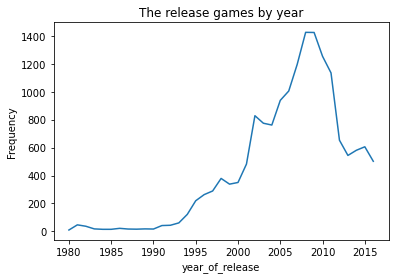

In [113]:
games_data.groupby(['year_of_release'])['name'].count().plot()
plt.title('The release games by year')
plt.ylabel('Frequency')
plt.show()

The graph shows that there were not so much games in 1980-1990 period.

The biggest sales were in 2009 and after that we can see decline.

Look at how sales varied from platform to platform. 

In [114]:
games_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Choose the platforms with the greatest total sales.

In [115]:
data_platforms=games_data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
data_platforms

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


PS2 is the platform with the biggest sales.

Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

In [116]:
top_sales_platforms = ['PS2', 'X360', 'PS3', 'Wii']

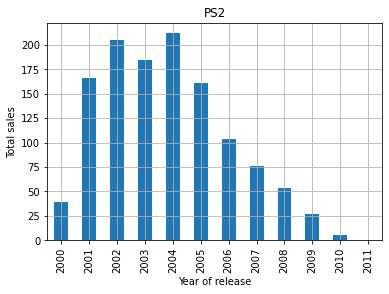

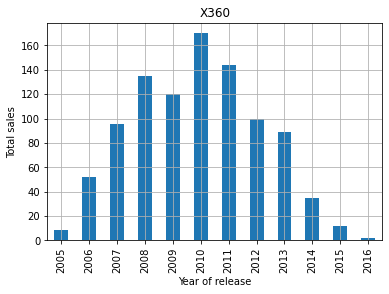

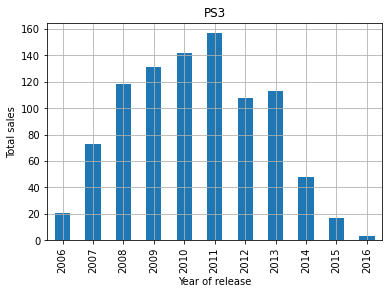

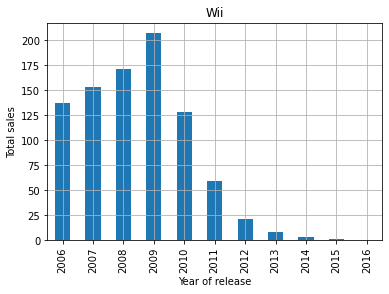

In [117]:
for top_platform in top_sales_platforms:
    games_data.query('platform == @top_platform').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.title(top_platform)
    plt.show()

Using four platforms as an example we see that live period of each platform about 10 years. They grow in first 5 years and after that decline.

Find platforms that used to be popular but now have zero sales.

In [118]:
data_platforms['zero_sales']=(data_platforms['total_sales']-data_platforms['total_sales'].mean())/data_platforms['total_sales'].std()
data_platforms

,platform,total_sales,zero_sales
0,PCFX,0.03,-0.826577
1,GG,0.04,-0.826548
2,3DO,0.10,-0.826373
3,TG16,0.16,-0.826199
4,WS,1.42,-0.822536
5,NG,1.44,-0.822477
6,SCD,1.86,-0.821256
7,DC,15.95,-0.780292
8,GEN,28.35,-0.744240
9,SAT,33.59,-0.729006


How long does it generally take for new platforms to appear and old ones to fade?

In [119]:
data_platforms=games_data[games_data['year_of_release'] >= 2000]

In [120]:
data_age=data_platforms.groupby(['platform'])['year_of_release'].agg(['min','max'])
data_age

,min,max
platform,,
3DS,2011,2016
DC,2000,2008
DS,2004,2013
GB,2000,2001
GBA,2000,2007
GC,2001,2007
N64,2000,2002
PC,2000,2016
PS,2000,2003


In [121]:
data_age['age'] = (data_age['max'] - data_age['min']).median()
data_age['age']

platform
3DS     6.5
DC      6.5
DS      6.5
GB      6.5
GBA     6.5
GC      6.5
N64     6.5
PC      6.5
PS      6.5
PS2     6.5
PS3     6.5
PS4     6.5
PSP     6.5
PSV     6.5
WS      6.5
Wii     6.5
WiiU    6.5
X360    6.5
XB      6.5
XOne    6.5
Name: age, dtype: float64

We can see that general live of platforms is about 6.5 years.

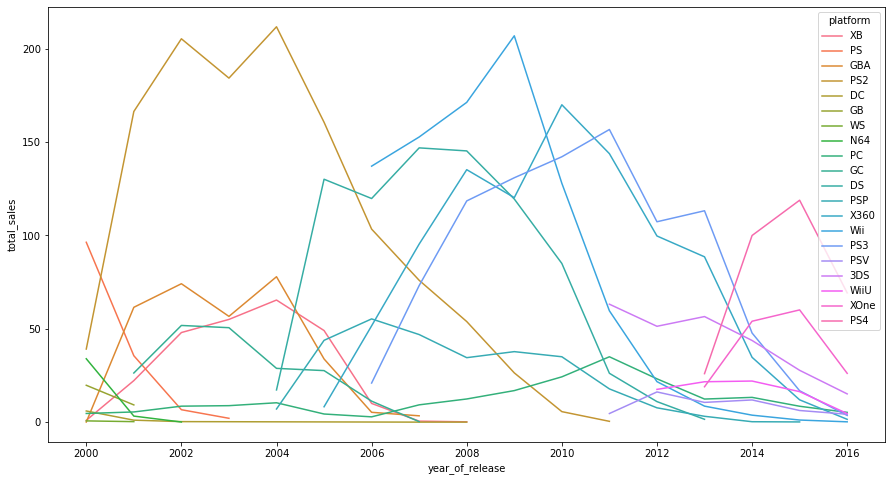

In [122]:
data_platforms=data_platforms.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=data_platforms, x="year_of_release", y="total_sales",hue="platform")


Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.

We can take period from 2000 because before marker of games wasn't big. But we see that market changes really fast so if we make analyses for 2017 year, we will take last 5 years (from 2012).

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [123]:
new_data = games_data[games_data['year_of_release'] >= 2012]
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [124]:
data_platforms=pd.pivot_table(new_data,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
data_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [125]:
data_platforms.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


We can see 3DS, PS4 and XOne as leaders.

 Which ones are growing or shrinking? Select several potentially profitable platforms.

In [126]:
data_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [127]:
#use shift function for shift index by desired number of periods with an optional time freq
data_platforms.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2014,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2015,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [128]:
data_platforms-data_platforms.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,5.21,-9.47,-10.84,5.89,25.99,-4.55,-5.60,-13.12,4.09,-11.16,18.96
2014,-12.81,-1.54,0.90,-65.49,74.01,-2.90,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [129]:
dynamics = (data_platforms-data_platforms.shift(+1)).T
dynamics

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,NaN,5.21,-12.81,-15.98,-12.64
DS,NaN,-9.47,-1.54,0.00,0.00
PC,NaN,-10.84,0.90,-4.76,-3.27
PS3,NaN,5.89,-65.49,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.55,-2.90,-0.12,-0.12
PSV,NaN,-5.60,1.31,-5.65,-2.00
Wii,NaN,-13.12,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

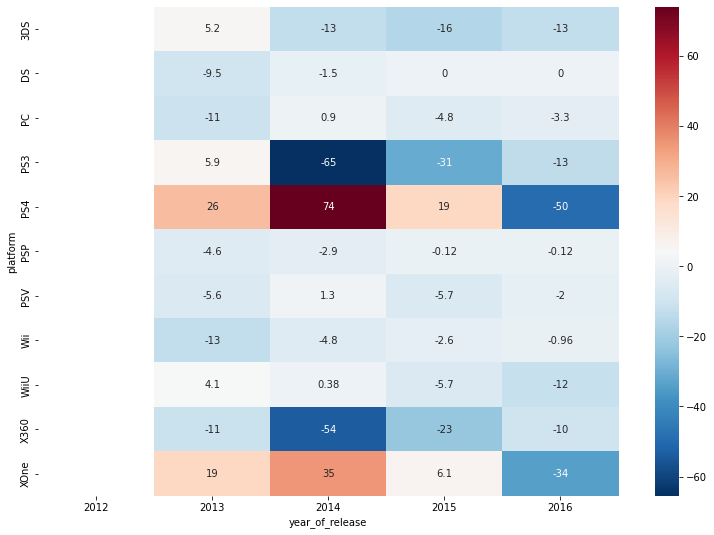

In [130]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r', annot=True)

We can see that mostly all platforms have the same cycle: appear in the market, become popular and then go down. Except for PS4 and XOne. They are still have revenue.

Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

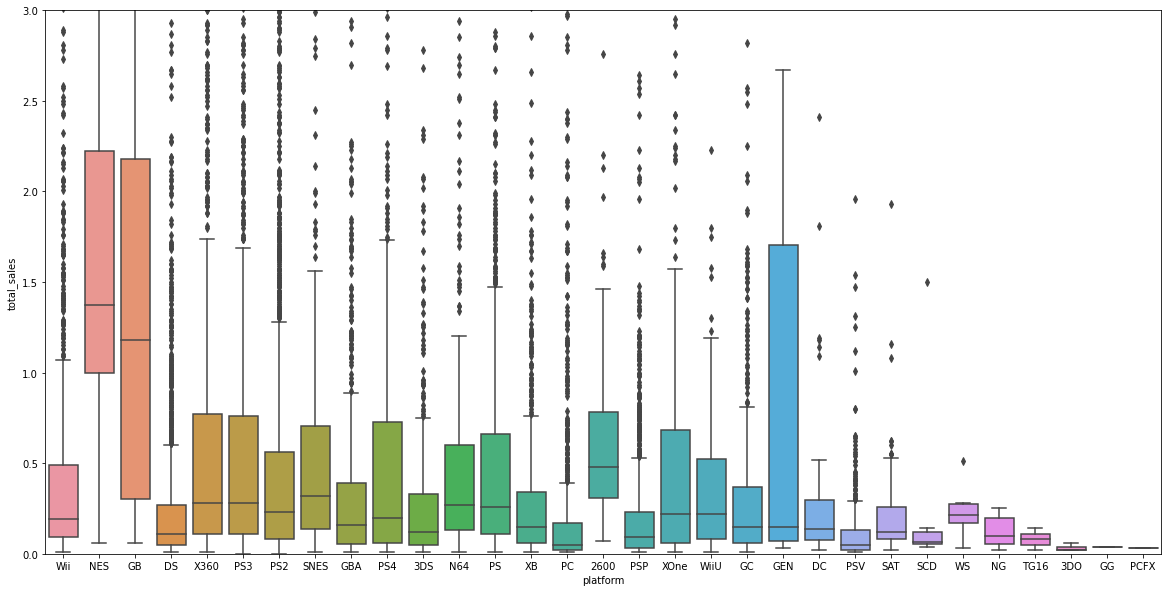

In [131]:
plt.figure(figsize=(20,10))
plt.ylim(0,3)
sns.boxplot(x='platform', y='total_sales', data=games_data)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good plot)

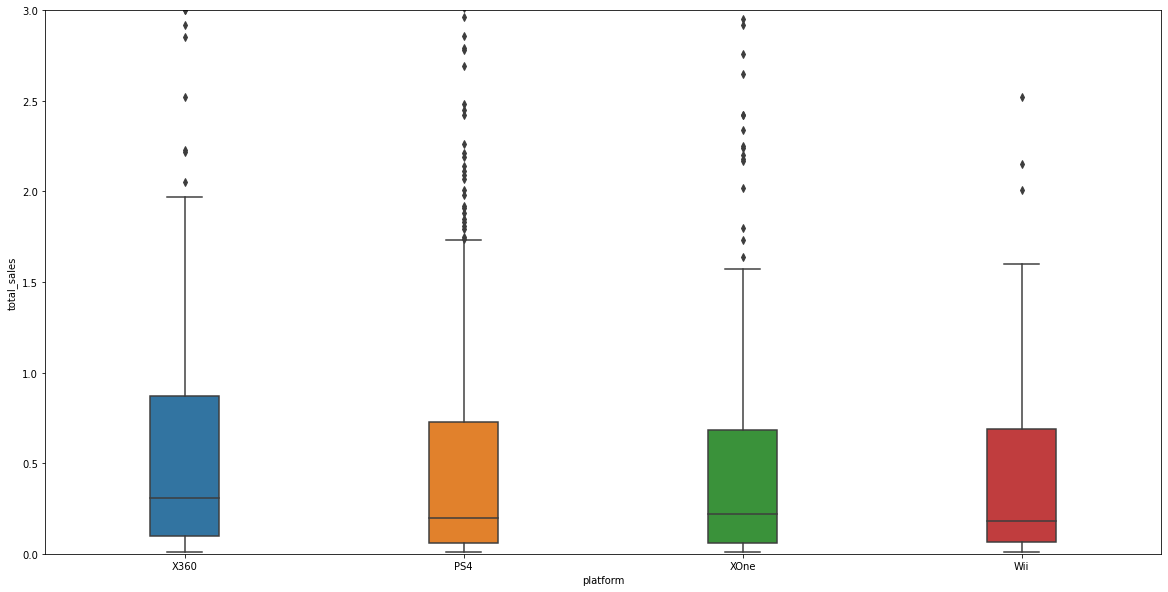

In [132]:
new_data = new_data.loc[(new_data['platform'] == 'PS4') | (new_data['platform'] == 'XOne')| (new_data['platform'] == 'X360') | (new_data['platform'] == 'Wii')]

plt.figure(figsize=(20,10))
sns.boxplot(x = 'platform', y = 'total_sales',data = new_data, width = 0.25)
plt.ylim(0,3)
plt.show()

The graphs show that the difference in game sales for each platform depends on the platform. We can see that on some platforms this spread is huge, such as GB or GEN, and on some platforms, such as SCD, NES and PCFX, it is completely small. Also can see that the median for sales on different platforms is also quite different. It varies from 0.1 to more than 1 million. If look at the spread of sales in the previously selected platforms X360, PS4, XOne and Wii, they are almost identical. The median is about 0.2 million. The revenue of X360 and PS4 does not exceed 1.8 million and the revenue of XOne and Wii does not exceed 1.6 million.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [133]:
genre_list = new_data['genre'].unique()
genre_list

array(['Action', 'Shooter', 'Misc', 'Sports', 'Role-Playing', 'Fighting',
       'Racing', 'Platform', 'Adventure', 'Puzzle', 'Strategy',
       'Simulation'], dtype=object)

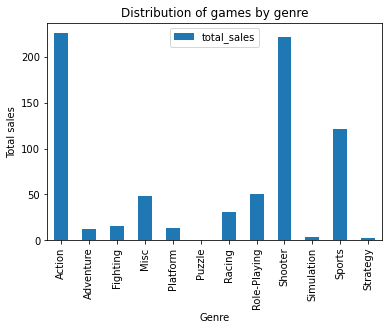

In [134]:
popular_genrs = new_data.groupby(['genre'])['total_sales'].sum().plot(kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('Distribution of games by genre')
plt.legend()
plt.show ()

On graph from 2012 to 2016 years we can see that the most popular games are action and shooter.

Conclusion:

Analyzed how many games were released in different years.

Analyzed how sales changed from platform to platform

Was determined period you should take data to build a prognosis for 2017.

Found out that mostly all platforms have the same cycle: appear in the market, become popular and then go down. Except for PS4 and XOne. They are still have revenue.

3DS, PS4 and XOne are leaders in sales in 2012-2016.

The most popular games are action and shooter.

### 4. Create a user profile for each region

For regions NA, EU, JP.

In [146]:
#top 5 platforms for NA
na=games_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,platform,na_sales
28,X360,595.74
16,PS2,572.92
26,Wii,486.87
17,PS3,390.13
4,DS,380.31


Text(0, 0.5, 'Sales')

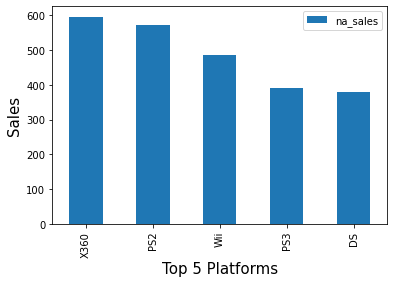

In [144]:
games_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [137]:
#top 5 platforms for EU
eu=games_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,platform,eu_sales
16,PS2,332.63
17,PS3,327.21
28,X360,268.32
26,Wii,258.32
15,PS,212.39


Text(0, 0.5, 'Sales')

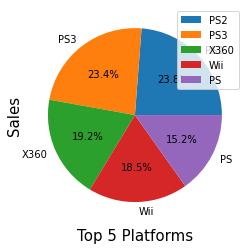

In [149]:
games_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head().set_index('platform').plot.pie(autopct='%1.1f%%',subplots=True)
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [63]:
#top 5 platforms for JP
jp=games_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,platform,jp_sales
4,DS,175.02
15,PS,139.78
16,PS2,137.54
23,SNES,116.55
2,3DS,100.62


Text(0, 0.5, 'Sales')

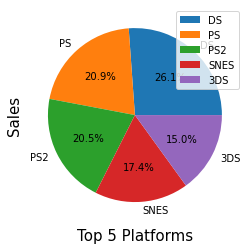

In [150]:
games_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head().set_index('platform').plot.pie(autopct='%1.1f%%',subplots=True)
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [64]:
#top 5 platforms for NA by genre
na=games_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


Text(0, 0.5, 'Sales')

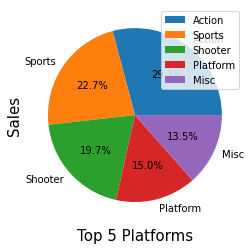

In [151]:
games_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head().set_index('genre').plot.pie(autopct='%1.1f%%',subplots=True)
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [65]:
#top 5 platforms for EU by genre
eu=games_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,genre,eu_sales
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


Text(0, 0.5, 'Sales')

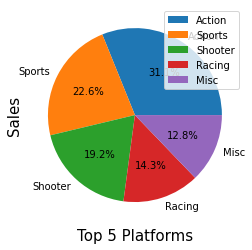

In [152]:
games_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head().set_index('genre').plot.pie(autopct='%1.1f%%',subplots=True)
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [66]:
#top 5 platforms for JP by genre
jp=games_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


Text(0, 0.5, 'Sales')

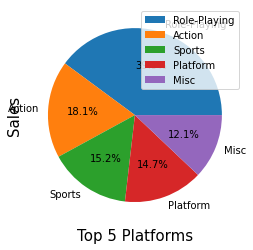

In [153]:
games_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head().set_index('genre').plot.pie(autopct='%1.1f%%',subplots=True)
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In EU and NA action on the first place, in JP-Role-Playing.

Do ESRB ratings affect sales in individual regions?

In [67]:
esrb_in_na = new_data.groupby(['rating'])['na_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_na.columns = ['total_sum', 'sum per game']
esrb_in_na

,total_sum,sum per game
rating,,
E,57.93,0.338772
E10+,45.32,0.356850
M,162.13,0.661755
T,40.63,0.230852
unknown,53.35,0.200564


In [68]:
esrb_in_ea = new_data.groupby(['rating'])['eu_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_ea.columns = ['total_sum', 'sum per game']
esrb_in_ea

,total_sum,sum per game
rating,,
E,55.14,0.322456
E10+,29.02,0.228504
M,119.82,0.489061
T,30.68,0.174318
unknown,44.46,0.167143


In [69]:
esrb_in_jp = new_data.groupby(['rating'])['jp_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_jp.columns = ['total_sum', 'sum per game']
esrb_in_jp

,total_sum,sum per game
rating,,
E,1.75,0.010234
E10+,1.04,0.008189
M,6.50,0.026531
T,3.28,0.018636
unknown,8.69,0.032669


In JP best seller is unknown, in NA and EU is M.

Conclusion:

The top five platforms were reviewed. 

The top 5 genres: in EU and NA action on the first place, in JP-Role-Playing.

ESRB ratings affect sales in individual regions. In JP best seller is unknown, in NA and EU is M.

### 5. Test hypotheses.

Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.

In [70]:
data1 = games_data.loc[games_data['platform']=='XOne', 'user_score'].dropna()
data2 = games_data.loc[games_data['platform']=='PC', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(data1,data2)

print('p-value:', results.pvalue)

if np.all(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    

p-value: 1.3037979620149106e-05
We reject the null hypothesis


Average user ratings of the Xbox One and PC platforms are different.

Null hypothesis: Average user ratings for the Action and Sports genres are same.

Alternative hypothesis: Average user ratings for the Action and Sports genres are not same.

In [71]:
data3 = games_data.loc[games_data['genre']=='Action', 'user_score'].dropna()
data4 = games_data.loc[games_data['genre']=='Sports', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(data3,data4)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.06480928064420527
We can't reject the null hypothesis


Average user ratings for the Action and Sports genres are same.

Conclusion: 

Average user ratings of the Xbox One and PC platforms are different.

Average user ratings for the Action and Sports genres are different.

### 6. Write an overall conclusion.

In first part we opened data.

In second part:

Replaced the column names

Converted the data to the required types.

Dropped nan values.

Changed missing values with unknown.

Calculated the total sales for each game.

In part 3:

Analyzed how many games were released in different years.

Analyzed how sales changed from platform to platform

Was determined period you should take data to build a prognosis for 2017.

Found out that mostly all platforms have the same cycle: appear in the market, become popular and then go down. Except for PS4 and XOne. They are still have revenue.

3DS, PS4 and XOne are leaders in sales in 2012-2016.

The most popular games are action and shooter.

In 4th part:

The top five platforms were reviewed.

The top 5 genres: in EU and NA action on the first place, in JP-Role-Playing.

ESRB ratings affect sales in individual regions. In JP best seller is unknown, in NA and EU is M.

In the last part:

Average user ratings of the Xbox One and PC platforms are different.

Average user ratings for the Action and Sports genres are different.